Increase the number of matcher, fix the number of sent-to to 1

In [4]:
from util.util import load_curves, load_log

# Load Data
n = [1500, 1500, 1500]
m = [1, 2, 5, 7, 10]
st = [1, 1, 1, 1, 1]
data = {}

for _n in n:
    for _mIdx in range(len(m)):
        folder_name = f"../result/test/price_curve_{st[_mIdx]}_{m[_mIdx]}_{_n}"
        local_curves, onchain_curve, average_of_local_curves = load_curves(folder_name)
        log = load_log(f"{folder_name}/logs.json")
        data[f"{st[_mIdx]}_{m[_mIdx]}_{_n}"] = {
            "local_curves": local_curves,
            "onchain_curve": onchain_curve,
            "avg_local_curves": average_of_local_curves,
            "log": {
                **log,
                "Gas": log["AliceGas"]
                + log["SuperMatcherGas"]
                + log["ReporterGas"]
                + log["WorkerGas"]
                + log["MatcherGas"],
            },
        }
        
clob_data = {}
for _n in n:
    log = load_log(f"../clob_onchain/logs_{_n}.json")
    clob_data[f"{_n}"] = log

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


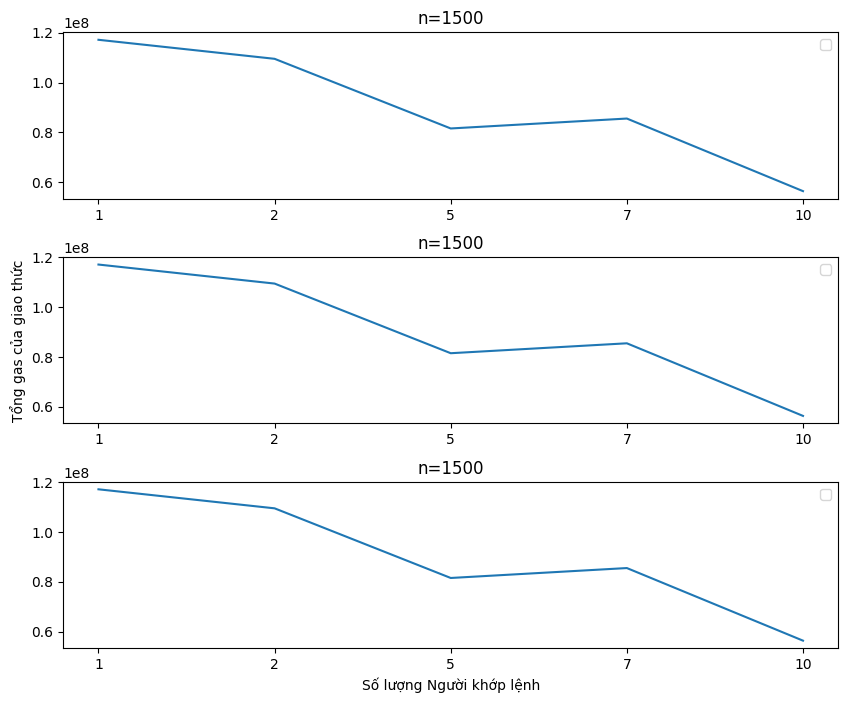

In [5]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 8))
for i, _n in enumerate(n):
    axes[i].plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["Gas"] for _m in m],
        # label=f"",
    )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].set_title(f"n={_n}")
    axes[i].legend()
# axes[0].set_title('Tổng gas của giao thức')
axes[1].set_ylabel('Tổng gas của giao thức')
axes[2].set_xlabel('Số lượng Người khớp lệnh')
plt.subplots_adjust(hspace=0.35)
# plt.savefig("GAS_fix_NoSendTo_increase_NoMatcher.png", bbox_inches='tight')
# plt.legend()
plt.show()

In [6]:
# import matplotlib.pyplot as plt

# idx = [i for i in range(len(m))]
# fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 8))
# for i, _n in enumerate(n):
#     axes[i].plot(
#         [
#             data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
#             + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]
#             for _m in m
#         ],
#         label=f"Tổng thời gian",
#     )
#     axes[i].plot(
#         [
#             data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
#             for _m in m
#         ],
#         label=f"Cục bộ",
#     )
#     axes[i].plot(
#         [
#             data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]
#             for _m in m
#         ],
#         label=f"HĐTM",
#     )
#     axes[i].set_xticks(idx)
#     axes[i].set_xticklabels(m)
#     axes[i].legend()
#     axes[i].set_title(f"n={_n}")
# # axes[0].set_title("Tổng thời gian khớp lệnh")
# axes[1].set_ylabel("Tổng thời gian khớp lệnh")
# axes[2].set_xlabel("Số lượng Người khớp lệnh")
# plt.subplots_adjust(hspace=0.35)
# # plt.savefig("Time_fix_NoSendTo_increase_NoMatcher.png", bbox_inches='tight')
# plt.legend()
# plt.show()

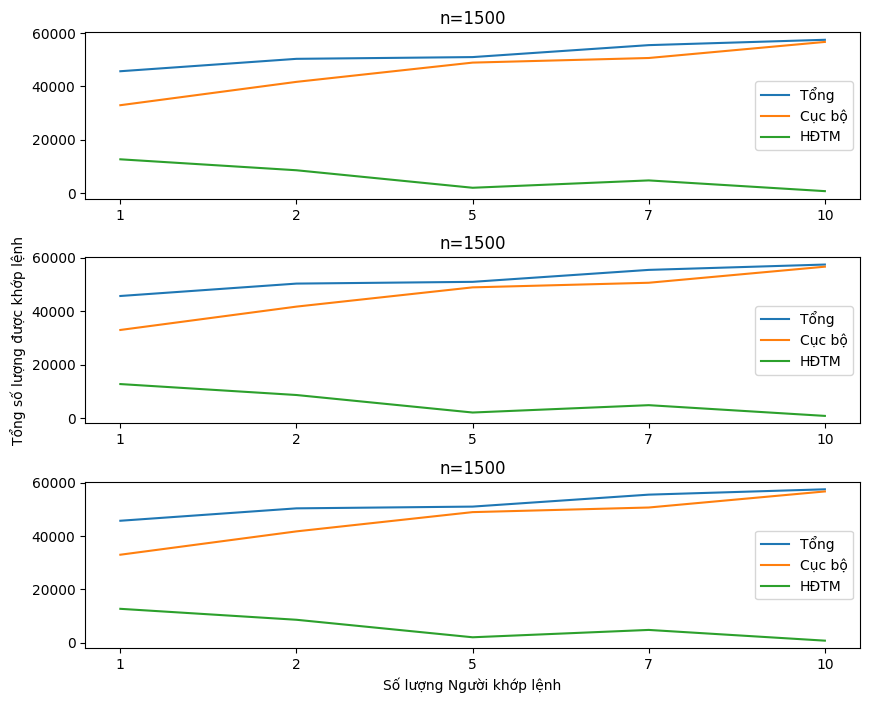

In [7]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 8))
for i, _n in enumerate(n):
    axes[i].plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchedAmount"]
            + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchedAmount"]
            for _m in m
        ],
        label=f"Tổng",
    )
    axes[i].plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchedAmount"] for _m in m],
        label="Cục bộ",
    )
    axes[i].plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchedAmount"] for _m in m],
        label="HĐTM",
    )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].legend()
    axes[i].set_title(f"n={_n}")
# axes[0].set_title("Amount")
axes[1].set_ylabel("Tổng số lượng được khớp lệnh")
axes[2].set_xlabel("Số lượng Người khớp lệnh")
plt.subplots_adjust(hspace=0.35)
# plt.savefig("Amount_fix_NoSendTo_increase_NoMatcher.png", bbox_inches="tight")
plt.legend()
plt.show()

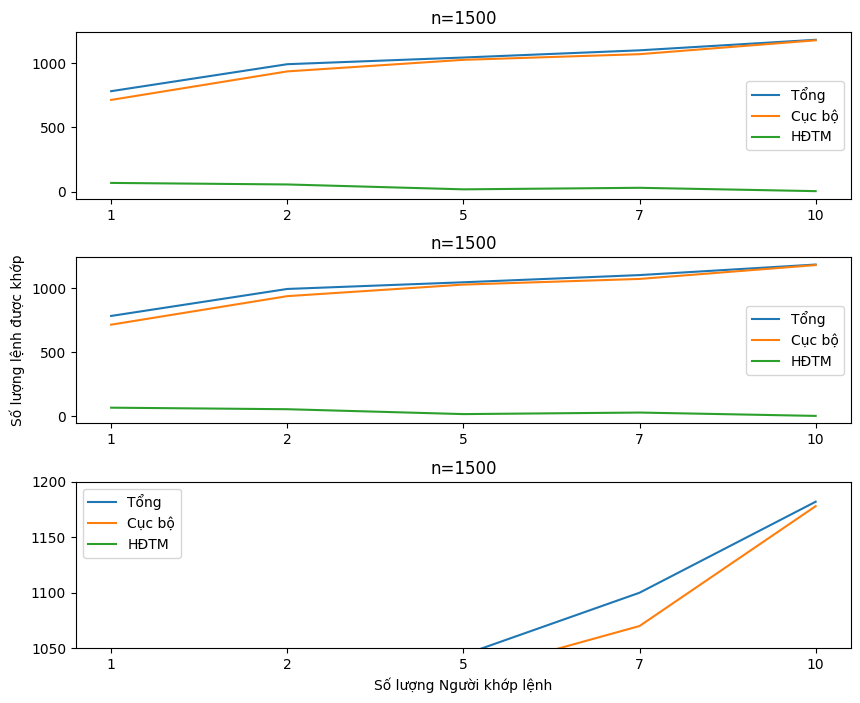

In [13]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 8))
for i, _n in enumerate(n):
    axes[i].plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"]
            + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"]
            for _m in m
        ],
        label=f"Tổng",
    )
    axes[i].plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"] for _m in m],
        label="Cục bộ",
    )
    axes[i].plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"] for _m in m],
        label="HĐTM",
    )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].legend()
    axes[i].set_title(f"n={_n}")
# axes[0].set_title("Amount")
axes[1].set_ylabel("Số lượng lệnh được khớp")
axes[2].set_xlabel("Số lượng Người khớp lệnh")
axes[2].set_ylim(1050, 1200)
plt.subplots_adjust(hspace=0.35)
# plt.savefig("NoMatchedOrders_fix_NoSendTo_increase_NoMatcher.png", bbox_inches="tight")
plt.legend()
plt.show()

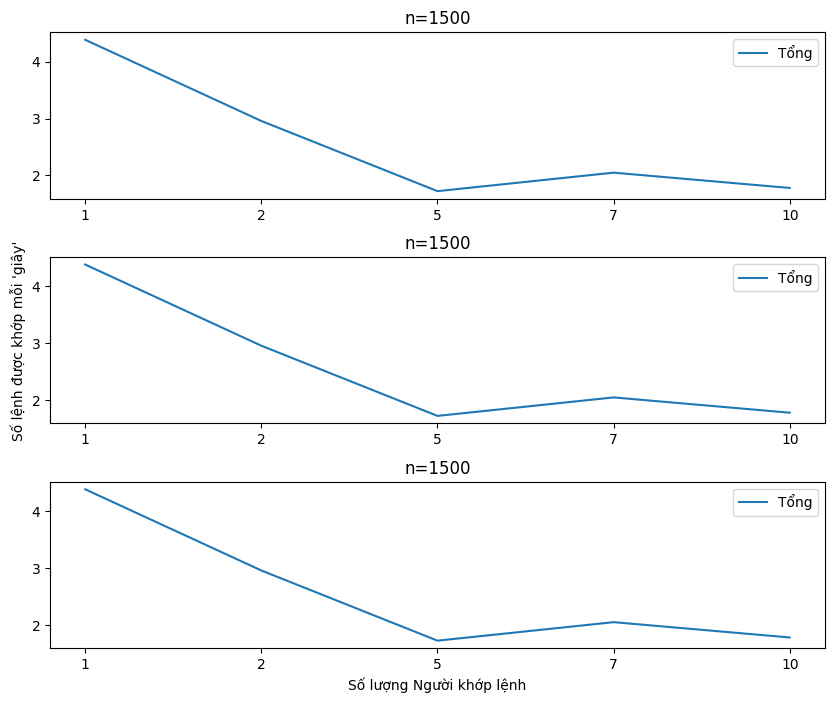

In [9]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 8))
for i, _n in enumerate(n):
    axes[i].plot(
        [
            (
                data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
                + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]
            )
            / (
                data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"]
                + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"][
                    "NumberOfMatchedOrderOnchain"
                ]
            )
            for _m in m
        ],
        label=f"Tổng",
    )
    # axes[i].plot(
    #     [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"] for _m in m],
    #     label="Cục bộ",
    # )
    # axes[i].plot(
    #     [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"] for _m in m],
    #     label="HĐTM",
    # )
    axes[i].set_xticks(idx)
    axes[i].set_xticklabels(m)
    axes[i].legend()
    axes[i].set_title(f"n={_n}")
# axes[0].set_title("Amount")
axes[1].set_ylabel("Số lệnh được khớp mỗi 'giây'")
axes[2].set_xlabel("Số lượng Người khớp lệnh")
plt.subplots_adjust(hspace=0.35)
# plt.savefig("NoMatchedOrders_fix_NoSendTo_increase_NoMatcher.png", bbox_inches="tight")
plt.legend()
plt.show()